<a href="https://colab.research.google.com/github/justprophet/Movie-Recommendation-System/blob/master/code/Content_based_prediction_using_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [0]:
import numpy as np

In [0]:
import pandas as pd
import io

## Mounting Drive and loading data

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df=pd.read_csv('gdrive/My Drive/Assignment 2/Data/merged_without_ratings_data.csv')

In [0]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,genres,id,overview,popularity,title,vote_average,vote_count,cast,crew,keywords
0,0,0,0,"['Animation', 'Comedy', 'Family']",862.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...","['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,1,1,1,"['Adventure', 'Fantasy', 'Family']",8844.0,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...","['board game', 'disappearance', ""based on chil..."
2,2,2,2,"['Romance', 'Comedy']",15602.0,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...","['fishing', 'best friend', 'duringcreditssting..."
3,3,3,3,"['Comedy', 'Drama', 'Romance']",31357.0,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...","['based on novel', 'interracial relationship',..."
4,4,4,4,['Comedy'],11862.0,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...","['baby', 'midlife crisis', 'confidence', 'agin..."


In [0]:
df['cast']

0        ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...
1        ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...
2        ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...
3        ['Whitney Houston', 'Angela Bassett', 'Loretta...
4        ['Steve Martin', 'Diane Keaton', 'Martin Short...
5        ['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...
6        ['Harrison Ford', 'Julia Ormond', 'Greg Kinnea...
7        ['Jonathan Taylor Thomas', 'Brad Renfro', 'Rac...
8        ['Jean-Claude Van Damme', 'Powers Boothe', 'Do...
9        ['Pierce Brosnan', 'Sean Bean', 'Izabella Scor...
10       ['Michael Douglas', 'Annette Bening', 'Michael...
11       ['Leslie Nielsen', 'Mel Brooks', 'Amy Yasbeck'...
12       ['Kevin Bacon', 'Bob Hoskins', 'Bridget Fonda'...
13       ['Anthony Hopkins', 'Joan Allen', 'Powers Boot...
14       ['Geena Davis', 'Matthew Modine', 'Frank Lange...
15       ['Robert De Niro', 'Sharon Stone', 'Joe Pesci'...
16       ['Kate Winslet', 'Emma Thompson', 'Hugh Grant'.

##Extracting names from cast, crew and keywords

In [0]:
from ast import literal_eval
import ast
df['cast'] = df['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [0]:
df['crew'] = df['crew'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [0]:
df['keywords'] = df['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [0]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,genres,id,overview,popularity,title,vote_average,vote_count,cast,crew,keywords
0,0,0,0,"['Animation', 'Comedy', 'Family']",862.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...","['jealousy', 'toy', 'boy', 'friendship', 'frie..."
1,1,1,1,"['Adventure', 'Fantasy', 'Family']",8844.0,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...","['board game', 'disappearance', ""based on chil..."
2,2,2,2,"['Romance', 'Comedy']",15602.0,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...","['fishing', 'best friend', 'duringcreditssting..."
3,3,3,3,"['Comedy', 'Drama', 'Romance']",31357.0,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...","['based on novel', 'interracial relationship',..."
4,4,4,4,['Comedy'],11862.0,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...","['baby', 'midlife crisis', 'confidence', 'agin..."


In [0]:
df.to_csv('gdrive/My Drive/Assignment 2/Data/merged_without_ratings_data.csv')

In [0]:
df=pd.read_csv('gdrive/My Drive/Assignment 2/Data/merged_without_ratings_data.csv')

##Concatinating Cast_Crew

In [0]:
df['CastCrew'] = df['cast'] + df['crew']
df['CastCrew'].head()

0    ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...
1    ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...
2    ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...
3    ['Whitney Houston', 'Angela Bassett', 'Loretta...
4    ['Steve Martin', 'Diane Keaton', 'Martin Short...
Name: CastCrew, dtype: object

In [0]:
df_small = df[0:25000]

In [0]:
df_small.shape

(25000, 15)

In [0]:
df_small.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'genres', 'id', 'overview', 'popularity', 'title', 'vote_average',
       'vote_count', 'cast', 'crew', 'keywords', 'CastCrew'],
      dtype='object')

#Overview_Based

In [0]:
df_small['overview'].head(5)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

## Creating TFIDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_small['overview'].dropna())
tfidf_matrix.shape

(25000, 53259)

We see that over 53259 different words were used to describe the 25000 movies in our dataset.



In [0]:
#compute similarity score using the cosine similarity matrix
from sklearn.metrics.pairwise import linear_kernel

In [0]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and dataframe indices which means we need a mechanism to identify the index of a movie in our dataframe, given its title.

In [0]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df_small.index, index=df_small['title']).drop_duplicates()

In [0]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    #return df_small['title'].iloc[movie_indices]
    
    topMovies = df_small['title'].iloc[movie_indices]
    movie_ratings = [i[1] for i in sim_scores]
    topMovies['Score'] = movie_ratings
    return  topMovies

In [0]:
df_small.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,genres,id,overview,popularity,title,vote_average,vote_count,cast,crew,keywords,CastCrew
0,0,0,0,0,"['Animation', 'Comedy', 'Family']",862.0,"Led by Woody, Andy's toys live happily in his ...",21.946943,Toy Story,7.7,5415.0,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...","['John Lasseter', 'Joss Whedon', 'Andrew Stant...","['jealousy', 'toy', 'boy', 'friendship', 'frie...","['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim..."
1,1,1,1,1,"['Adventure', 'Fantasy', 'Family']",8844.0,When siblings Judy and Peter discover an encha...,17.015539,Jumanji,6.9,2413.0,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...","['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...","['board game', 'disappearance', ""based on chil...","['Robin Williams', 'Jonathan Hyde', 'Kirsten D..."
2,2,2,2,2,"['Romance', 'Comedy']",15602.0,A family wedding reignites the ancient feud be...,11.712900,Grumpier Old Men,6.5,92.0,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...","['Howard Deutch', 'Mark Steven Johnson', 'Mark...","['fishing', 'best friend', 'duringcreditssting...","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret..."
3,3,3,3,3,"['Comedy', 'Drama', 'Romance']",31357.0,"Cheated on, mistreated and stepped on, the wom...",3.859495,Waiting to Exhale,6.1,34.0,"['Whitney Houston', 'Angela Bassett', 'Loretta...","['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...","['based on novel', 'interracial relationship',...","['Whitney Houston', 'Angela Bassett', 'Loretta..."
4,4,4,4,4,['Comedy'],11862.0,Just when George Banks has recovered from his ...,8.387519,Father of the Bride Part II,5.7,173.0,"['Steve Martin', 'Diane Keaton', 'Martin Short...","['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...","['baby', 'midlife crisis', 'confidence', 'agin...","['Steve Martin', 'Diane Keaton', 'Martin Short..."


In [0]:
get_recommendations('Jumanji')

21605                   Table No. 21
6176                       Brainscan
8815                         Quintet
17248                 The Dark Angel
9520                       Word Wars
13643    The Mindscape of Alan Moore
16878                         DeVour
8094                         Masques
13753                     Rhinoceros
6065                Poolhall Junkies
Name: title, dtype: object

In [0]:
topMovies=get_recommendations('Toy Story')

In [0]:
print(topMovies)

15378                                          Toy Story 3
2994                                           Toy Story 2
10319                               The 40 Year Old Virgin
24463                                            Small Fry
23790                          Andy Hardy's Blonde Trouble
8342                                             The Champ
1067                                 Rebel Without a Cause
11424                               For Your Consideration
1928                                             Condorman
21333                             Andy Hardy's Double Life
Score    [0.5272751473212888, 0.4647118869780595, 0.279...
Name: title, dtype: object


In [0]:
print("--------------Scores---------------------------")
print(topMovies['Score'])

--------------Scores---------------------------
[0.5272751473212888, 0.4647118869780595, 0.279148651754355, 0.269745896641082, 0.2382600693023101, 0.19912457050659385, 0.18091206703157695, 0.15574533564762452, 0.15515328234459766, 0.14514603774129484]


In [0]:
titles = np.array(topMovies)[0:10]
score = np.array(topMovies['Score'])

## Plotting Similarity Scores of top 10 movies

In [0]:
from textwrap import wrap
titles = [ '\n'.join(wrap(l, 10)) for l in titles ]

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 40,20

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


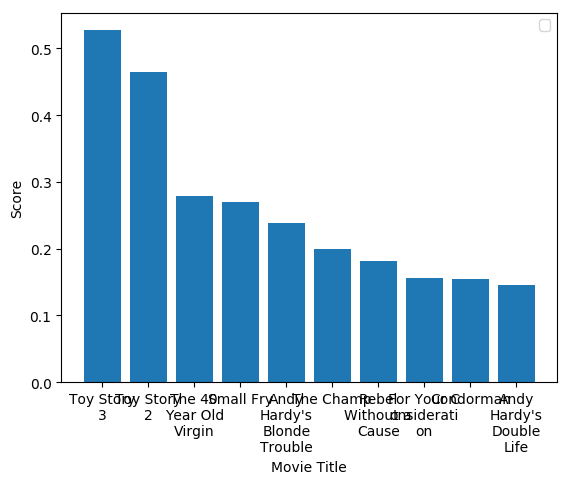

In [0]:
ind = np.arange(1,len(score)+1)
plt.title("")
plt.ylabel("Score")
plt.xlabel("Movie Title")
plt.bar(ind, score,tick_label=titles, align = 'center')
plt.legend()
plt.show()

In [0]:
df_small['cast'].head(5)

0    ['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...
1    ['Robin Williams', 'Jonathan Hyde', 'Kirsten D...
2    ['Walter Matthau', 'Jack Lemmon', 'Ann-Margret...
3    ['Whitney Houston', 'Angela Bassett', 'Loretta...
4    ['Steve Martin', 'Diane Keaton', 'Martin Short...
Name: cast, dtype: object

In [0]:
df_small['crew'].head(5)

0    ['John Lasseter', 'Joss Whedon', 'Andrew Stant...
1    ['Larry J. Franco', 'Jonathan Hensleigh', 'Jam...
2    ['Howard Deutch', 'Mark Steven Johnson', 'Mark...
3    ['Forest Whitaker', 'Ronald Bass', 'Ronald Bas...
4    ['Alan Silvestri', 'Elliot Davis', 'Nancy Meye...
Name: crew, dtype: object

In [0]:
df_small['keywords'].head(5)

0    ['jealousy', 'toy', 'boy', 'friendship', 'frie...
1    ['board game', 'disappearance', "based on chil...
2    ['fishing', 'best friend', 'duringcreditssting...
3    ['based on novel', 'interracial relationship',...
4    ['baby', 'midlife crisis', 'confidence', 'agin...
Name: keywords, dtype: object

#Cast_Crew_Based_Recommendation

In [0]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf2 = TfidfVectorizer(stop_words='english')
#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix2 = tfidf2.fit_transform(df_small['CastCrew'].dropna())
tfidf_matrix2.shape

(25000, 113799)

In [0]:
tfidf_matrix2

<25000x113799 sparse matrix of type '<class 'numpy.float64'>'
	with 1228716 stored elements in Compressed Sparse Row format>

In [0]:
cosine_sim_castcrew = linear_kernel(tfidf_matrix2, tfidf_matrix2)

In [0]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations_CastCrew(title, cosine_sim=cosine_sim_castcrew):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df_small['title'].iloc[movie_indices]

In [0]:
get_recommendations_CastCrew('Toy Story')

2994              Toy Story 2
4757           Monsters, Inc.
15378             Toy Story 3
12730                  WALL·E
6242             Finding Nemo
2236             A Bug's Life
13765                      Up
21898    Toy Story of Terror!
19097                  Presto
10998                    Cars
Name: title, dtype: object